In [ ]:
#pip install opencv-python

In [1]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop

import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_dir = "C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train"
train_dir

'C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train'

In [3]:
#import os  # changes the directory
#os.chdir('C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_test/asl_alphabet_test')

In [4]:
test_dir = "C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_test/asl_alphabet_test"

In [5]:
train_dir = "C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/"

In [6]:
train_dir

'C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/'

In [7]:
imageSize=75

In [14]:

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            num_images=0     #new code to reduce images
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                num_images= num_images + 1   # new code
                if num_images > 1000:    # new code  #With x images the code is running alright
                    break    # new code
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir) 
#X_test, y_test= get_data(test_dir) # Too few images

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]) One hot encoded vector 
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 26) # change to 29
y_testHot = to_categorical(y_test, num_classes = 26)  # change to 29

 33%|██████████████████████████                                                    | 1000/3000 [00:10<00:21, 91.16it/s]


In [15]:
len(X_train)

20820

In [16]:
len(X_test)

5206

In [17]:
len(y_trainHot)

20820

In [18]:
len(y_testHot)

5206

In [19]:
len(y_test)

5206

In [20]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:90000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:90000]
y_testHot = y_testHot[:30000]

In [21]:
len(X_test)

5206

In [22]:
len(y_testHot)

5206

In [23]:
len(y_train) 

20820

In [24]:
len(X_train)

20820

In [25]:
len(y_trainHot)

20820

In [26]:
print(X_train)

[[[[0.89433551 0.02189542 0.03235294]
   [0.75359477 0.07745098 0.10392157]
   [0.73464052 0.08823529 0.10119826]
   ...
   [0.74259259 0.06808279 0.0875817 ]
   [0.78856209 0.11535948 0.12875817]
   [0.87668845 0.09422658 0.10141612]]

  [[0.7627451  0.07647059 0.08529412]
   [0.31372549 0.28431373 0.34019608]
   [0.27941176 0.30065359 0.37973856]
   ...
   [0.41764706 0.39052288 0.42156863]
   [0.5627451  0.54607843 0.54509804]
   [0.71993464 0.39542484 0.38169935]]

  [[0.7077342  0.06786492 0.06993464]
   [0.20457516 0.24836601 0.29411765]
   [0.14825708 0.24651416 0.2916122 ]
   ...
   [0.55119826 0.57788671 0.56993464]
   [0.54934641 0.55816993 0.52810458]
   [0.70457516 0.39934641 0.36535948]]

  ...

  [[0.86416122 0.17581699 0.15501089]
   [0.77614379 0.71666667 0.63398693]
   [0.7332244  0.72211329 0.64694989]
   ...
   [0.44771242 0.55751634 0.66002179]
   [0.45751634 0.55       0.65359477]
   [0.65239651 0.38823529 0.46470588]]

  [[0.84673203 0.1754902  0.15163399]
   [0.7

In [27]:
print(y_trainHot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
len(y_trainHot)

20820

In [29]:
len(y_testHot)

5206

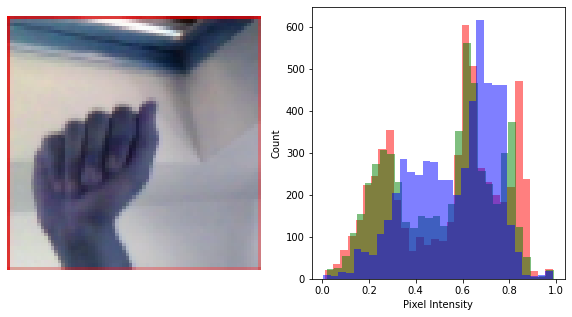

In [36]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[245])

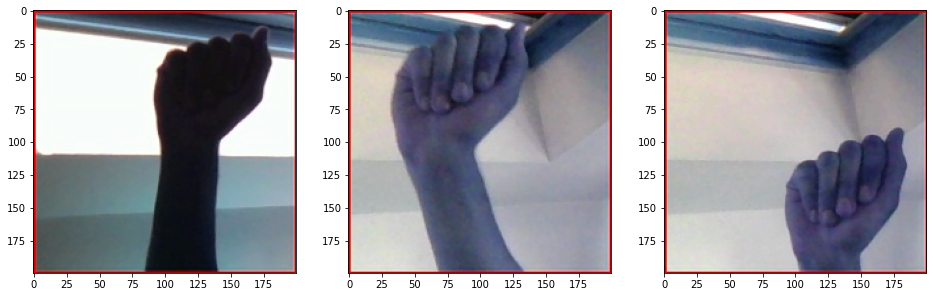

In [25]:
multipleImages = glob('C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/A/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    #;
plotThreeImages(multipleImages)

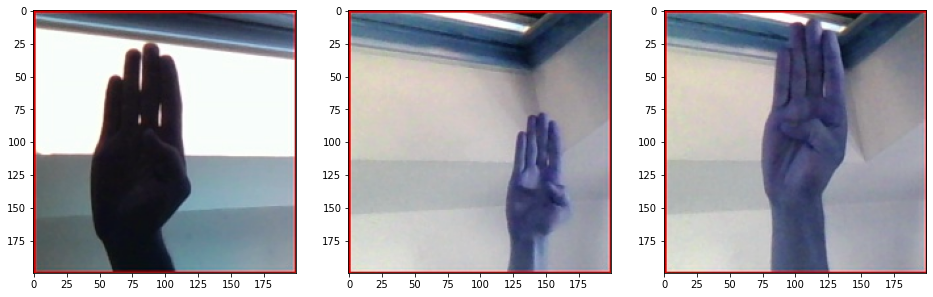

In [26]:
multipleImages = glob('C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/B/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])) 
plotThreeImages(multipleImages)

K


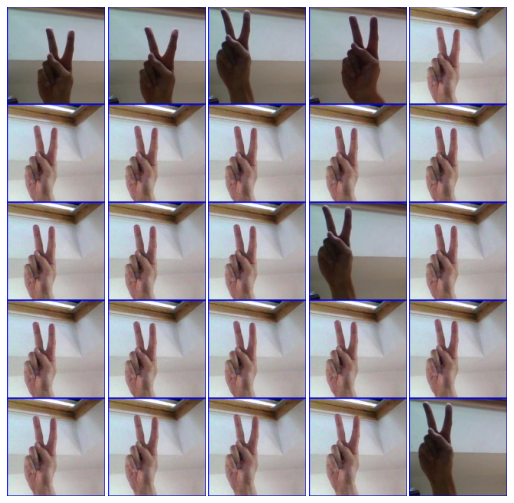

In [39]:
print("K")
multipleImages = glob('C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/K/**')
i_ = 0
plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

B


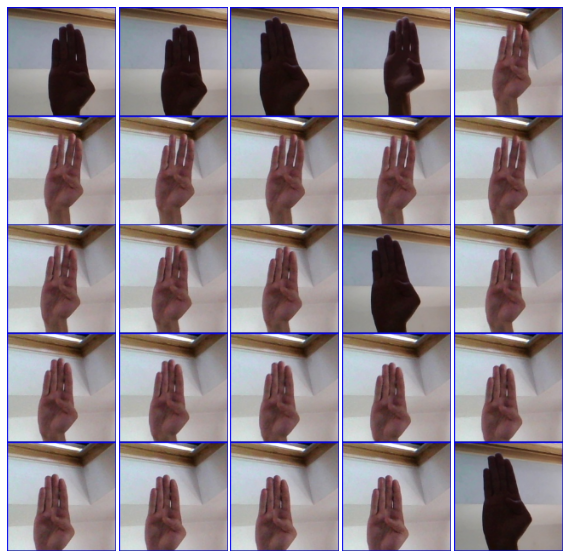

In [28]:
print("B")
multipleImages = glob('C:/Users/magno/Desktop/Fondations in AI/Python/Project/asl_alphabet_train/asl_alphabet_train/B/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

C:\Users\magno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


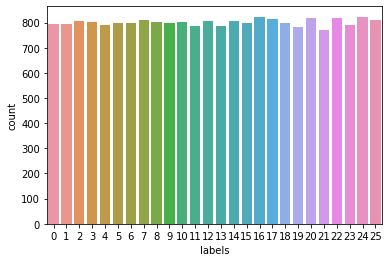

In [37]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 
                  12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 
                  23: 'X', 24: 'Y', 25: 'Z'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


C:\Users\magno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


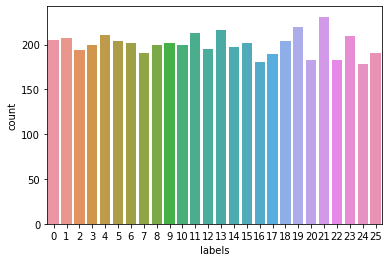

In [38]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 
                  12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 
                  23: 'X', 24: 'Y', 25: 'Z'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_test
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [41]:
# Number of A's in the training dataset
num_A_train = sum(y_train==0)
# Number of B's in the training dataset
num_B_train = sum(y_train==1)
# Number of C's in the training dataset
num_C_train = sum(y_train==2)
num_D_train = sum(y_train==3)
num_E_train = sum(y_train==4)
num_F_train = sum(y_train==5)
num_G_train = sum(y_train==6)
num_H_train = sum(y_train==7)
num_I_train = sum(y_train==8)
num_J_train = sum(y_train==9)
num_K_train = sum(y_train==10)
num_L_train = sum(y_train==11)
num_M_train = sum(y_train==12)
num_N_train = sum(y_train==13)
num_O_train = sum(y_train==14)
num_P_train = sum(y_train==15)
num_Q_train = sum(y_train==16)
num_R_train = sum(y_train==17)
num_S_train = sum(y_train==18)
num_T_train = sum(y_train==19)
num_U_train = sum(y_train==20)
num_V_train = sum(y_train==21)
num_W_train = sum(y_train==22)
num_X_train = sum(y_train==23)
num_Y_train = sum(y_train==24)
num_Z_train = sum(y_train==25)

# Number of A's in the test dataset
num_A_test = sum(y_test==0)
# Number of B's in the test dataset
num_B_test = sum(y_test==1)
# Number of C's in the test dataset
num_C_test = sum(y_test==2)
num_D_test = sum(y_test==3)
num_E_test = sum(y_test==4)
num_F_test = sum(y_test==5)
num_G_test = sum(y_test==6)
num_H_test = sum(y_test==7)
num_I_test = sum(y_test==8)
num_J_test = sum(y_test==9)
num_K_test = sum(y_test==10)
num_L_test = sum(y_test==11)
num_M_test = sum(y_test==12)
num_N_test = sum(y_test==13)
num_O_test = sum(y_test==14)
num_P_test = sum(y_test==15)
num_Q_test = sum(y_test==16)
num_R_test = sum(y_test==17)
num_S_test = sum(y_test==18)
num_T_test = sum(y_test==19)
num_U_test = sum(y_test==20)
num_V_test = sum(y_test==21)
num_W_test = sum(y_test==22)
num_X_test = sum(y_test==23)
num_Y_test = sum(y_test==24)
num_Z_test = sum(y_test==25)

# Print statistics about the dataset
print("Training set:")
print("\tA: {}, B: {}, C: {}, D: {}, E: {}, F: {}, G: {}, H: {}, I: {}, J: {}, K: {}, L: {}, M: {}, N: {}, O: {}, P: {}, Q: {}, R: {}, S: {}, T: {}, U: {}, V: {}, W: {}, X: {}, Y: {}, Z: {}".format(num_A_train,
num_B_train, num_C_train, num_D_train, num_E_train, num_F_train, num_G_train, num_H_train, num_I_train, num_J_train, 
num_K_train, num_L_train, num_M_train, num_N_train, num_O_train, num_P_train, num_Q_train, num_R_train, num_S_train, 
num_T_train, num_U_train, num_V_train, num_W_train, num_X_train, num_Y_train, num_Z_train))
print("Test set:")
print("\tA: {}, B: {}, C: {}, D: {}, E: {}, F: {}, G: {}, H: {}, I: {}, J: {}, K: {}, L: {}, M: {}, N: {}, O: {}, P: {}, Q: {}, R: {}, S: {}, T: {}, U: {}, V: {}, W: {}, X: {}, Y: {}, Z: {}".format(num_A_test, 
num_B_test, num_C_test, num_D_test, num_E_test, num_F_test, num_G_test, num_H_test, num_I_test, num_J_test, 
num_K_test, num_L_test, num_M_test, num_N_test, num_O_test, num_P_test, num_Q_test, num_R_test, num_S_test, 
num_T_test, num_U_test, num_V_test, num_W_test, num_X_test, num_Y_test, num_Z_test))

Training set:
	A: 796, B: 794, C: 807, D: 801, E: 790, F: 797, G: 799, H: 810, I: 802, J: 799, K: 801, L: 788, M: 806, N: 785, O: 804, P: 799, Q: 820, R: 812, S: 797, T: 782, U: 818, V: 770, W: 818, X: 791, Y: 823, Z: 811
Test set:
	A: 205, B: 207, C: 194, D: 200, E: 211, F: 204, G: 202, H: 191, I: 199, J: 202, K: 200, L: 213, M: 195, N: 216, O: 197, P: 202, Q: 181, R: 189, S: 204, T: 219, U: 183, V: 231, W: 183, X: 210, Y: 178, Z: 190


In [42]:
# Helper Functions  Learning Curves and Confusion Matrix

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  #saving checkpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,            #confusion matrix
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):           #learning curve
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [43]:

map_characters1 = map_characters
class_weight1 = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)   
#class_weight1 = class_weight.compute_class_weight( class_weight ='balanced', classes = np.unique(y_train), y= y_train)

#weight_path1 = 'C:/Users/magno/Desktop/Fondations in AI/Python/Project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weight_path2 = 'C:/Users/magno/Desktop/Fondations in AI/Python/Project/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(imageSize, imageSize, 3))
pretrained_model_2 = InceptionV3(weights = weight_path2, include_top=False, input_shape=(imageSize, imageSize, 3))
optimizer1 = Adam()
optimizer2 = RMSprop(lr=0.0001)
def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,optimizer,labels):
    base_model = pretrainedmodel # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)  #insert dense layer - new top to the network
    model = Model(inputs=base_model.input, outputs=predictions)
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False  #don't train the early layers
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['acc'])  #changing from accuracy to acc
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary() #printing the details
    # Fit model
    #history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    history = model.fit(xtrain,ytrain, epochs=numepochs, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    #plotKerasLearningCurve()
    #plt.show()
    plot_learning_curve(history)
    plt.show()
    return model


C:\Users\magno\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25], y=[ 1  2 19 ... 12 14 18] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\magno\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [44]:
  def evaluate_model (model,xtest,ytest):  
    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = model.predict(xtest)
    #print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
    print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1)), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1)
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    #plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plot_confusion_matrix(confusion_mtx, classes = list(range(0,29)))
    plt.show()

In [45]:
list(range(0,29))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [36]:
#don't forget to assign the below to 'trained_model'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

Epoch 1/20
651/651 [==============================] - 136s 194ms/step - loss: 0.8220 - acc: 0.8088 - val_loss: 0.3344 - val_acc: 0.9339
Epoch 2/20
651/651 [==============================] - 99s 153ms/step - loss: 0.2305 - acc: 0.9597 - val_loss: 0.1893 - val_acc: 0.9633
Epoch 3/20
651/651 [==============================] - 98s 151ms/step - loss: 0.1341 - acc: 0.9779 - val_loss: 0.1257 - val_acc: 0.9758
Epoch 4/20
651/651 [==============================] - 100s 154ms/step - loss: 0.0891 - acc: 0.9870 - val_loss: 0.1123 - val_acc: 0.9733
Epoch 5/20
651/651 [==============================] - 99s 153ms/step - loss: 0.0642 - acc: 0.9921 - val_loss: 0.0831 - val_acc: 0.9827
Epoch 6/20
651/651 [==============================] - 98s 151ms/step - loss: 0.0466 - acc: 0.9953 - val_loss: 0.0690 - val_acc: 0.9862
Epoch 7/20
651/651 [==============================] - 100s 154ms/step - loss: 0.0364 - acc: 0.9962 - val_loss: 0.0580 - val_acc: 0.9879
Epoch 8/20
651/651 [==============================] 

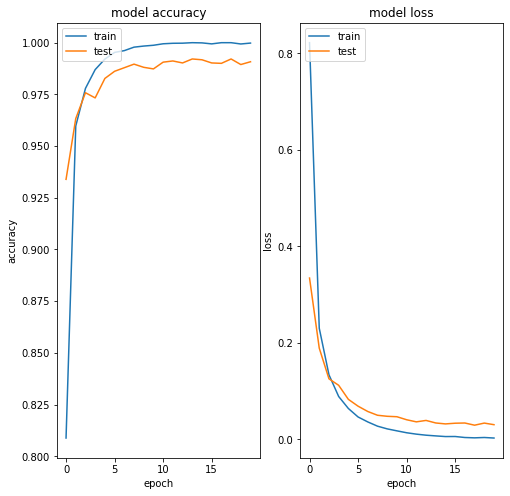

In [46]:
trained_model_inception_v3= pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,pretrained_model_2,weight_path2,class_weight1,
                                 26,20,optimizer1,map_characters1)


Keras CNN - accuracy: 0.9907798767089844 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       207
           2       1.00      1.00      1.00       194
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       204
           6       1.00      1.00      1.00       202
           7       0.99      1.00      1.00       191
           8       0.99      0.99      0.99       199
           9       1.00      1.00      1.00       202
          10       1.00      0.99      1.00       200
          11       1.00      1.00      1.00       213
          12       0.99      0.98      0.99       195
          13       1.00      0.98      0.99       216
          14       1.00      0.98      0.99       197
          15       1.00      0.99      0.99       202
          16       0.99      0.99   

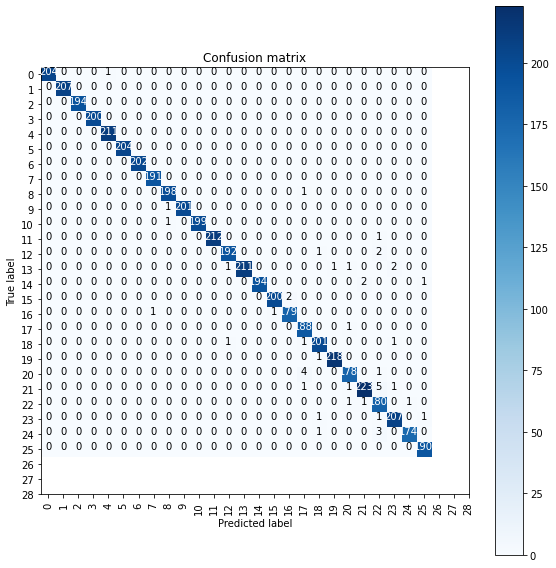

In [47]:
evaluate_model(trained_model_inception_v3,X_test, y_testHot)  #testing data

In [39]:
trained_model_inception_v3.save('asl_saved_model_InceptV3_26_1500_20') #save the model with x images per letter and x Epoch

INFO:tensorflow:Assets written to: asl_saved_model_InceptV3_26_1500_20\assets


In [ ]:
loaded_model_1= keras.models.load_model('asl_saved_model_1000_1') #how to load a model

In [ ]:
loaded_model_2= keras.models.load_model('asl_saved_model_29_1500_5')

In [ ]:
loaded_model_3= keras.models.load_model('asl_saved_model_29_2000_10')

In [ ]:
loaded_model_4= keras.models.load_model('asl_saved_model_29_2500_15')

In [47]:
loaded_model_10= keras.models.load_model('asl_saved_model_InceptV3_26_1000_20')

In [ ]:
evaluate_model(loaded_model_2,X_test, y_testHot)  #testing data

8. Detect in Real-Time